In [1]:
import pandas as pd
import os
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('metadata/UrbanSound8K.csv')

In [3]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [4]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]

fold1 = 'audio/fold1'
list1 = os.listdir(fold1)

fold2 = 'audio/fold2'
list2 = os.listdir(fold2)

fold3 = 'audio/fold3'
list3 = os.listdir(fold3)

fold4 = 'audio/fold4'
list4 = os.listdir(fold4)

fold5 = 'audio/fold5'
list5 = os.listdir(fold5)

fold6 = 'audio/fold6'
list6 = os.listdir(fold6)

fold7 = 'audio/fold7'
list7 = os.listdir(fold7)

fold8 = 'audio/fold8'
list8 = os.listdir(fold8)

fold9 = 'audio/fold9'
list9 = os.listdir(fold9)

fold10 = 'audio/fold10'
list10 = os.listdir(fold10)

lista = list1 + list2 + list3 + list4 + list5 + list6 + list7 + list8 + list9 + list10

In [5]:
#ha excecoes: audio/fold[]/.DS_store

def path_class(filename):
    excerpt = df[df['slice_file_name'] == filename]
    
    if not excerpt.empty:
        path_name = os.path.join('audio', 'fold'+str(excerpt.fold.values[0]), filename)
        return path_name
    
    else:
        return None

In [6]:
path_list=[]
for i in lista:
    p = path_class(i)
    if (p!=None):
        path_list.append(p)

In [7]:
# Normalização min-max
def normalize(y):
    min_val = np.min(y)
    max_val = np.max(y)
    ynormalized = (y - min_val) / (max_val - min_val)
    return ynormalized

############################################################################################################################
    #Ver com qual normalizacao da melhor accuracy
        
    #Normalizacao z-score -> nao sei se funciona imprimiu uma wave de 5-10 no y-axis
    #media = np.mean(y_extended)
    #desvio_padrao = np.std(y_extended)
    #ynormalized2 = (y_extended - media) / desvio_padrao
        
    #Normalizacao por amplitude maxima
    #max_amplitude = np.max(np.abs(y_extended))
    #ynormalized3 = y_extended / max_amplitude
        
    #Nao se pode usar
    #Normalizacao logaritmica 
    #ynormalized4 = np.log(1 + y_extended)
        
    #Normalizacao Tangente Hiperbólica
    #ynormalized5 = np.tanh(y_extended)
        
    #Normalizacao L1
    #ynormalized6 = y_extended / np.sum(np.abs(y_extended))
        
    #Normalizacao L2
    #ynormalized7 = y_extended / np.sqrt(np.sum(y_extended**2))
############################################################################################################################

# Wave

In [8]:
sr = 44100
hop_length=round(sr*0.0125)
window_length=round(sr*0.023)
n_fft=2**14

In [9]:
#dataset=np.zeros(shape=[len(path_list),4*sr])

In [10]:
resample_sr = 44100 #sample rate padrao
desired = 4.0 #tempo do audio padrao
i=0
for f in path_list:
    f = f'{f}'
    y, previous_sr = librosa.load(f, sr=None)
    y_resample =librosa.resample(y, orig_sr=previous_sr, target_sr=sr)
    
    if len(y_resample)<4*sr:
        # Calculate the number of times to repeat the audio
        repeat = int(np.ceil(desired * sr / len(y_resample)))

        # Repeat the audio
        y_extended = np.tile(y_resample, repeat)

        # Trim the array to the desired duration
        y_extended = y_extended[:int(desired * sr)]

    else:
        y_extended = y_resample
        
    ynormalized = normalize(y_extended)
    ynormalized = ynormalized[:4*sr]
    #dataset[i] = ynormalized

In [11]:
ynormalized.shape

(176400,)

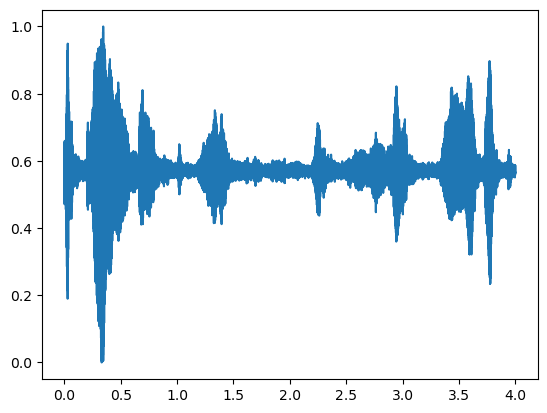

In [12]:
plt.plot(np.asarray(list(range(4*sr)))/sr,ynormalized)

# MFCCs c/ n_mfcc=40

In [13]:
n_mfcc=40
mfcc_time_size = 4*sr//hop_length+1

In [14]:
#dataset_mfcc=np.zeros(shape=[len(path_list),n_mfcc,mfcc_time_size])

In [15]:
# MFCCs

mfcc = librosa.feature.mfcc(y=ynormalized,sr=sr,n_fft=n_fft,hop_length=hop_length,win_length=window_length,n_mfcc=n_mfcc)
y_mfcc40 = normalize(mfcc)
#dataset_mfcc[i] = y_mfcc
i+=1

In [16]:
y_mfcc40.shape

(40, 321)

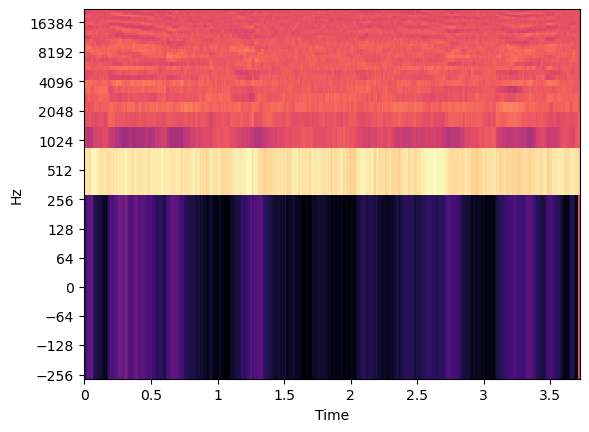

In [17]:
librosa.display.specshow(y_mfcc40, sr=sr, x_axis='time', y_axis='log')

# MFCCs c/ n_mfcc=13

In [18]:
n_mfcc=13

In [19]:
# MFCCs
mfcc = librosa.feature.mfcc(y=ynormalized,sr=sr,n_fft=n_fft,hop_length=hop_length,win_length=window_length,n_mfcc=n_mfcc)
y_mfcc13 = normalize(mfcc)
#dataset_mfcc[i] = y_mfcc
i+=1

In [20]:
y_mfcc13.shape

(13, 321)

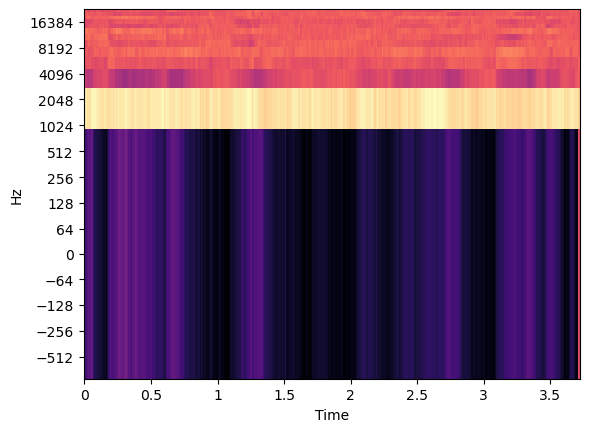

In [21]:
librosa.display.specshow(y_mfcc13, sr=sr, x_axis='time', y_axis='log')

# MFCCs DELTA

Delta features focus on noisy data.

In [22]:
mfcc_delta = librosa.feature.delta(y_mfcc13)
y_mfcc_delta = normalize(mfcc_delta)

In [23]:
y_mfcc_delta.shape

(13, 321)

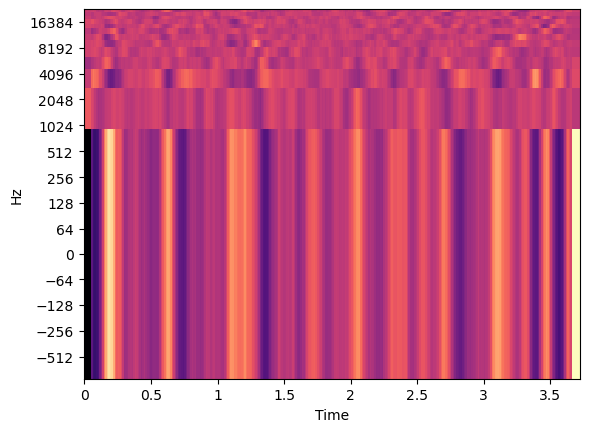

In [24]:
#Observar y_mfcc_delta
librosa.display.specshow(y_mfcc_delta, sr=sr, x_axis='time', y_axis='log')

# MFCCs DELTA Ordem 2

In [25]:
mfcc_delta2 = librosa.feature.delta(y_mfcc13, order=2)
y_mfcc_delta2 = normalize(mfcc_delta2)

In [26]:
y_mfcc_delta2.shape

(13, 321)

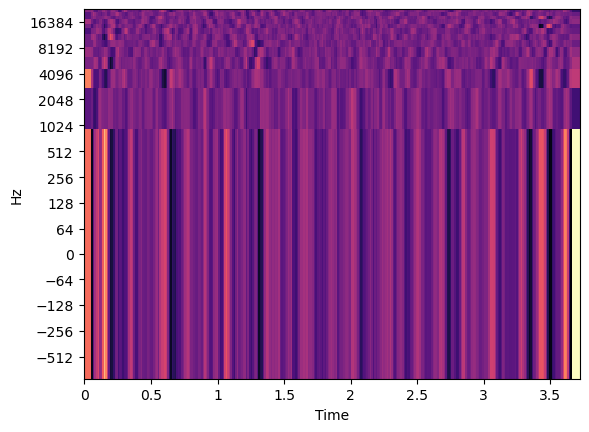

In [27]:
#Observar y_mfcc_delta2
librosa.display.specshow(y_mfcc_delta2, sr=sr, x_axis='time', y_axis='log')

# SPECTROGRAM

In [28]:
#dataset_spectrogram = np.empty((len(path_list), 8193, 321), dtype=np.float32)

In [29]:
#Spectogram

stft = librosa.core.stft(ynormalized, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)
y_spectrogram = normalize(spectrogram)
#dataset_spectrogram[i] = y_spectrogram

In [30]:
y_spectrogram.shape

(8193, 321)

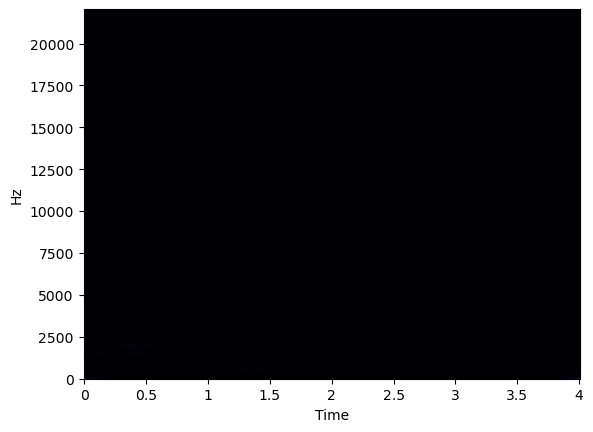

In [31]:
librosa.display.specshow(y_spectrogram,sr=sr,hop_length=hop_length,x_axis='time',y_axis='linear')

# LOG-SPECTROGRAM

In [32]:
#dataset_logspectrogram = np.empty((len(path_list), 8193, 321), dtype=np.float32)

In [33]:
#Log-Spectogram

logspectrogram = librosa.amplitude_to_db(y_spectrogram)
y_logspectrogram = normalize(logspectrogram)
#dataset_logspectrogram[i] = y_logspectrogram

In [34]:
y_logspectrogram.shape

(8193, 321)

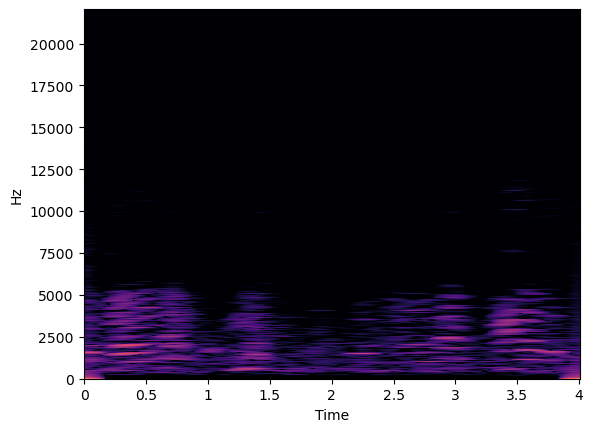

In [35]:
librosa.display.specshow(y_logspectrogram,sr=sr,hop_length=hop_length,x_axis='time',y_axis='linear')

# MELSPECTROGRAM

In [36]:
melstft = librosa.feature.melspectrogram(S=y_spectrogram, sr=sr)
y_melstft = normalize(melstft)

In [37]:
y_melstft.shape

(128, 321)

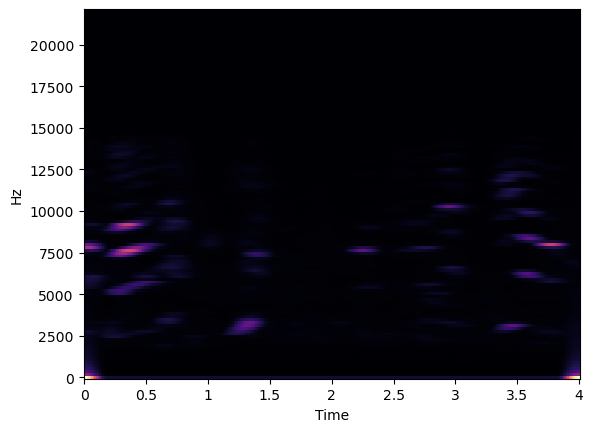

In [38]:
librosa.display.specshow(y_melstft,sr=sr,hop_length=hop_length,x_axis='time',y_axis='linear')

# MELSPECTROGRAM DB

In [39]:
melstft_db = librosa.power_to_db(y_melstft, ref=np.max)
y_melstft_db = normalize(melstft_db)

In [40]:
y_melstft_db.shape

(128, 321)

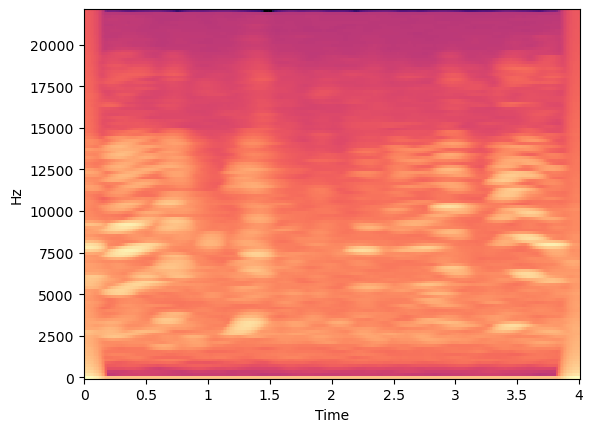

In [41]:
librosa.display.specshow(y_melstft_db,sr=sr,hop_length=hop_length,x_axis='time',y_axis='linear')

# CHROMA SPECTROGRAM

In [42]:
chroma = librosa.feature.chroma_stft(y=ynormalized, S=y_spectrogram, sr=sr)
y_chroma = normalize(chroma)

/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [43]:
y_chroma.shape

(12, 321)

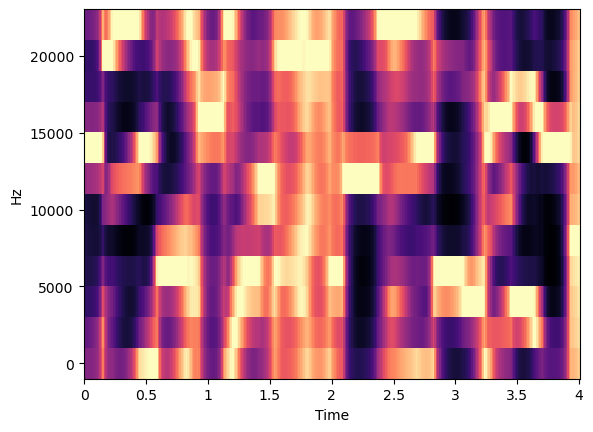

In [44]:
librosa.display.specshow(y_chroma,sr=sr,hop_length=hop_length,x_axis='time',y_axis='linear')

# Resultado de vários tipos de normalização

In [45]:
#Mostrar normalizacoes
#index=0
#plt.figure()
#plt.plot(np.asarray(list(range(4*sr)))/sr,dataset[index])
#plt.imshow(dataset_mfcc[index])
#plt.show()

# Imagens -> DataFrame -> csv

Testei com 1 exemplo só

In [46]:
newdata = pd.DataFrame()
newdata['wave'] = [np.zeros(4*sr) for _ in range(len(path_list))]
newdata['mfcc40'] = [np.zeros((40, mfcc_time_size)) for _ in range(len(path_list))]
newdata['mfcc13'] = [np.zeros((13, mfcc_time_size)) for _ in range(len(path_list))]
newdata['spectrogram'] = [np.empty((8193, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['logspectrogram'] = [np.empty((8193, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['melspectrogram'] = [np.empty((128, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['melspectrogram_db'] = [np.empty((128, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['melspectrogram_delta'] = [np.empty((40, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['melspectrogram_delta2'] = [np.empty((40, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['chromaspectrogram'] = [np.empty((12, 321), dtype=np.float32) for _ in range(len(path_list))]
i=0
for f in path_list:
    #print(f)
    f = f'{f}'
    path_parts = f.split('/')
    arquivo = path_parts[-1]
    
    if arquivo in df['slice_file_name'].values:
        fold = df[df['slice_file_name'] == arquivo].iloc[0]['fold']
        classe = df[df['slice_file_name'] == arquivo].iloc[0]['class']
        fsID = df[df['slice_file_name'] == arquivo].iloc[0]['fsID']
        salience = df[df['slice_file_name'] == arquivo].iloc[0]['salience']
        classID = df[df['slice_file_name'] == arquivo].iloc[0]['classID']
        

        newdata.at[i, 'file'] = arquivo
        newdata.at[i, 'fsID'] = fsID
        newdata.at[i, 'salience'] = salience
        newdata.at[i, 'fold'] = fold
        newdata.at[i, 'classID'] = classID
        newdata.at[i, 'class'] = classe
                     
    # np.column_stack é usado para combinar os valores do eixo x (np.asarray(list(range(4 * sr))) / sr) 
    # com os valores do eixo y (dataset[index]) em uma única matriz (ver plot)
    newdata.at[i, 'wave'] = np.column_stack((np.asarray(list(range(4 * sr))) / sr, ynormalized))
    
    # MFCCs 40
    newdata.at[i, 'mfcc40'] = y_mfcc40

    # MFCCs 13
    newdata.at[i, 'mfcc13'] = y_mfcc13
    
    #Spectrogram
    newdata.at[i, 'spectrogram'] = y_spectrogram
    
    #Log spectrogram
    newdata.at[i, 'logspectrogram'] = y_logspectrogram

    #Chroma spectrogram
    newdata.at[i, 'chromaspectrogram'] = y_chroma

    #Mel spectrogram
    newdata.at[i, 'melspectrogram'] = y_melstft

    #Mel spectrogram DB
    newdata.at[i, 'melspectrogram_db'] = y_melstft_db

    #Mel spectrogram delta
    newdata.at[i, 'melspectrogram_delta'] = y_mfcc_delta

    #Mel spectrogram delta ordem 2
    newdata.at[i, 'melspectrogram_delta2'] = y_mfcc_delta2
        
    i+=1
    

columns = ['file', 'fsID', 'salience', 'fold', 'wave', 'mfcc40', 'mfcc13', 'spectrogram', 'logspectrogram', 'chromaspectrogram', 'melspectrogram', 'melspectrogram_db', 'melspectrogram_delta', 'melspectrogram_delta2', 'classID', 'class']

newdata = newdata[columns]

In [47]:
#float_format='%.0f' -> aparecia fold: 7.0 em vez de 7

newdata.to_csv('features.csv', float_format='%.0f', index=False)

In [48]:
df2 = pd.read_csv('features.csv')

In [49]:
df2

,file,fsID,salience,fold,wave,mfcc40,mfcc13,spectrogram,logspectrogram,chromaspectrogram,melspectrogram,melspectrogram_db,melspectrogram_delta,melspectrogram_delta2,classID,class
0,135776-2-0-49.wav,135776,2,1,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,2,children_playing
1,46654-6-0-0.wav,46654,1,1,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,6,gun_shot
2,57320-0-0-24.wav,57320,2,1,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,0,air_conditioner
3,134717-0-0-26.wav,134717,1,1,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,0,air_conditioner
4,174276-7-5-0.wav,174276,1,1,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,7,jackhammer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,88121-8-0-0.wav,88121,2,10,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,8,siren
8728,189982-0-0-42.wav,189982,1,10,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95028466 ... 0.95184...,[[0.37965092 0.37791038 0.37708256 ... 0.86497...,[[0.99904996 0.9963025 0.9721576 ... 0.96703...,[[0.9999484 0.9997989 0.9984671 ... 0.99818...,[[0. 0. 0. ... 1. ...,[[0.6877985 0.6877985 0.6877985 ... 1. ...,0,air_conditioner
8729,74364-8-1-7.wav,74364,2,10,[[0.00000000e+00 6.38556600e-01]\n [2.26757370...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[0.6466268 0.2170187 0.26702678 ... 0.03610...,[[5.0008732e-01 5.6709427e-01 6.3261402e-01 .....,[[0.9247615 0.9384138 0.95